<a href="https://colab.research.google.com/github/Asfiya-edu/Web-Scrapping/blob/main/Python_Web_Scraping_Job_Portal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Exploring Data Science Job Opportunities 🔍🚀**

The mission here is to design a specialized tool that extracts and analyzes data science job listings from a single online source of your choice. Focuses on crafting a laser-focused web scraping solution tailored to the chosen platform, ensuring the collection of crucial details such as job titles, company names, experience requirements, salary ranges, and locations.


1. **Defining the Problem Statement:**

   **Business Objective:**
   To streamline the process of finding data science job opportunities by designing a specialized tool for extracting and analyzing job listings from a chosen online platform.

   **Desired Outcome for Data Science Project:**
   Develop a targeted web scraping solution tailored to the selected platform, ensuring the extraction of crucial details such as job titles, company names, experience requirements, salary ranges, and locations.

   **Problem Statement:**
   Creating a precise web scraping mechanism adept at extracting specific information from the chosen online platform, focusing on essential details required by job seekers and recruiters in the data science domain.

   **Evaluation Metrics:**
   - Accuracy of extracted data (job titles, company names, etc.)
   - Efficiency of data organization and cleaning
   - Effectiveness of insights generated from the extracted data
   
   **Implementation:**
   - Source Selection: Choose a preferred online platform for data science job listings (e.g., TimesJobs, LinkedIn Jobs, etc.) and specify the chosen source.
   - Web Scraping Precision: Engineer a targeted web scraping mechanism to extract specific information.
   - Data Extraction: Focus on extracting essential details from job listings, including job titles, company names, experience requirements, salary ranges, and locations.
   - Data Organization: Efficiently organize and clean the extracted data for clear presentation.
   - Insights Generation: Develop tools for analyzing the gathered data to generate actionable insights related to job titles, experience requirements, salary distributions, and geographic preferences.
   - Visualization: Create visual representations such as charts and graphs to effectively communicate insights to users.

**---------------------------------------------------------------------------------------------------------------------------------------------------**

**Problems Addressed by the Project:**

1. **Streamlining Job Search Process:**  
   - **Issue:** Job seekers often struggle to find relevant data science job opportunities efficiently due to scattered information across multiple platforms.
   - **Solution:** The project aims to design a specialized tool that extracts and analyzes data science job listings from a single online source, simplifying the job search process for aspiring data scientists.

2. **Data Overload and Information Overwhelm:**  
   - **Issue:** Job listings typically contain vast amounts of information, making it challenging for job seekers to identify key details such as job titles, required experience levels, and salary ranges.
   - **Solution:** The project focuses on extracting specific details from job listings, including crucial information like job titles, company names, experience requirements, salary ranges, and locations, streamlining the data analysis process for users.

3. **Lack of Insights into Job Market Trends:**  
   - **Issue:** Without insights into job market trends, job seekers may struggle to understand industry demand, salary distributions, and geographic preferences.
   - **Solution:** By generating insights from the extracted data, such as patterns related to job titles, experience requirements, salary distributions, and geographic preferences, the project provides valuable information to help job seekers make informed decisions about their career paths.

4. **Difficulty in Comparing Job Opportunities:**  
   - **Issue:** Job seekers often find it challenging to compare job opportunities effectively, especially when considering factors like salary ranges, required experience levels, and geographic locations.
   - **Solution:** Through efficient data organization and cleaning, the project ensures that extracted data is presented in a clear and understandable format, enabling users to compare job opportunities easily and make informed decisions about their next career steps.

### **Installing all requirements**

In [ ]:
# Install all requirements
!pip install requests
!pip install bs4
!pip install html5lib

In [ ]:
import csv
import requests
from bs4 import BeautifulSoup
from datetime import datetime

In [ ]:
url = 'https://www.timesjobs.com/candidate/job-search.html?searchType=personalizedSearch&from=submit&searchTextSrc=&searchTextText=&txtKeywords=Data+&txtLocation=India'
response = requests.get(url)
print(response)

<Response [200]>


### **Extracting Raw HTML**

In [ ]:
soup = BeautifulSoup(response.text, 'html.parser')
cards = soup.find_all('li', 'clearfix job-bx wht-shd-bx')
len(cards)

25

### **Generalizing the model and pagination with function**

In [ ]:
# Function to scape a single web page from timesjobs.com

def get_record(card):
    """ Extract job data from a single record """
    def extract_posted_text(date_span):
        """ Extract posted text while excluding certain elements """
        if date_span:
            unwanted_text = date_span.find('span', class_='jobs-status')
            if unwanted_text:
                unwanted_text.extract()  # Remove the unwanted span element

            return date_span.get_text(strip=True)
        else:
            return ''

    # Job title
    job_title = card.find('a').text.strip()

    # Company Name
    text = card.h3.text.strip()
    split_txt = text.split('\n')
    company_name = split_txt[0]

    # Experience level
    exp = card.find('i', class_='material-icons').next_sibling

    # Location
    job_loc = card.find('ul', class_='top-jd-dtl clearfix').text.strip()
    split_text = job_loc.split('\n')
    location_text = split_text[-1]

    # Job description
    discription = card.find('label').next_sibling.strip()

    # Key skills
    key_skills = card.find('span', class_='srp-skills').text.strip()

    # Date
    date_span = card.find('span', class_='sim-posted')
    posted_date = extract_posted_text(date_span)

    today = datetime.today().strftime('%Y-%m-%d')

    # Job URL
    url = card.find('a').get('href')

    # Salary range
    try:
        salary = card.find('i', class_='material-icons rupee').next_sibling
    except AttributeError:
        salary = ''

    record = (job_title, company_name, exp, salary, location_text, discription, key_skills, posted_date, today, url)

    return record

# Pagination Function

def scrape_with_pagination(base_url, total_pages):
    records = []  # Storing all job records here

    for page in range(1, total_pages + 1):
        page_url = f"{base_url}?from=submit&luceneResultSize=25&txtKeywords=Data&postWeek=60&searchType=personalizedSearch&actualTxtKeywords=Data&searchBy=0&rdoOperator=OR&txtLocation=India&pDate=I&sequence=1&startPage={page}"
        # print(f"Scraping page {page}: {page_url}")

        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36'
        }
        response = requests.get(page_url, headers=headers)
        soup = BeautifulSoup(response.content, 'html.parser')

        job_cards = soup.find_all('li', class_='clearfix job-bx wht-shd-bx')

        for job_card in job_cards:
            job_details = get_record(job_card)
            records.append(job_details)  # Append job details to the list

    # Define CSV file columns
    csv_columns = ['Job Title', 'Company Name', 'Experience', 'Salary', 'Location', 'Description', 'Key Skills', 'Posted Date', 'Current Date', 'Job URL']

    # Save records to a CSV file
    csv_file = 'Timesjobs_records.csv'
    with open(csv_file, 'w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(csv_columns)  # column headers

        for record in records:
            writer.writerow(record)  # Write job details to the CSV file

    print(f"Scraped job records saved to '{csv_file}'")

# Replace 'base_url' and 'total_pages' with actual values
base_url = 'https://www.timesjobs.com/candidate/job-search.html'
total_pages = 21  # Replace this with the total number of pages

scrape_with_pagination(base_url, total_pages)


Scraped job records saved to 'Timesjobs_records.csv'


# **Exploratory Data Analysis - Data Science Job Market Analysis Tool**

### **Problem Statement:**

The goal of this project is to design and implement a specialized tool for extracting, analyzing, and visualizing data science job listings from a chosen online platform. The platform selected for this analysis is TimesJobs, recognized for its comprehensive range of job listings.

Overall, this project aims to build a comprehensive data analysis tool that offers insights into the dynamics of data science job listings available on the TimesJobs platform. The tool will empower users to explore trends, patterns, and preferences within the data science job market, aiding job seekers and recruiters in making informed decisions.

**Data analysis Objective:-**

The objective is to facilitate informed decision-making in hiring and job-seeking processes within the data science domain.

## **Dataset Description**

### *Import Libraries*

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
filepath= "/content/drive/MyDrive/alma better/Timesjobs_records.csv"
df = pd.read_csv(filepath)

In [ ]:
df

,Job Title,Company Name,Experience,Salary,Location,Description,Key Skills,Posted Date,Current Date,Job URL
0,DATA ARCHITECT / DATA SCIENTIST,axmiyan hr solutions private limited,5 - 8 yrs,NaN,Gurgaon,"PRIMARY DUTIES , RESPONSIBILITIES AND REQUIRE...","reports , data mining , database design ,...",Posted few days ago,2023-12-24,https://www.timesjobs.com/job-detail/data-arch...
1,Data administration Data Entry,Vishal,0 - 3 yrs,Rs 1.20 - 3.25 Lacs p.a.,"Guntur, Kakinada, Khammam, Srinagar, Udhampur",You can earn unlimited money sitting anywhere ...,Work from home or anywhere giving ultimate fle...,Posted few days ago,2023-12-24,https://www.timesjobs.com/job-detail/data-admi...
2,Data administration Data Entry,Vishal,0 - 3 yrs,Rs 1.20 - 3.25 Lacs p.a.,"Guntur, Kakinada, Khammam, Rajahmundry, Wa...",We r looking for friendly candidates for onlin...,Golden chance for fresher work from mobile and...,Posted a month ago,2023-12-24,https://www.timesjobs.com/job-detail/data-admi...
3,Data administration Data Entry,Vishal,0 - 3 yrs,Rs 1.20 - 3.25 Lacs p.a.,"Guntur, Kakinada, Khammam, Srinagar, Udhampur",You can earn unlimited money sitting anywhere ...,You can do this job very easily Experience not...,Posted few days ago,2023-12-24,https://www.timesjobs.com/job-detail/data-admi...
4,Data administration Data Entry,Vishal,0 - 3 yrs,Rs 1.20 - 3.25 Lacs p.a.,"Nizamabad, Ongole, Surat, Karnal, Kanniyak...",*Get Offline Work to Opportunity to make good ...,Huge vacancies for only male candidate in our ...,Posted a month ago,2023-12-24,https://www.timesjobs.com/job-detail/data-admi...
...,...,...,...,...,...,...,...,...,...,...
520,Data Science,tcg digital solutions pvt ltd,3 - 5 yrs,NaN,Kolkata,Education Masters / Bachelors degree in Comput...,"data analytics , functional analysis , pre...",Posted few days ago,2023-12-24,https://www.timesjobs.com/job-detail/data-scie...
521,Data Analytics,HyreFox Consultants,0 - 3 yrs,NaN,Jaipur,We are looking for a passionate certified Data...,"data analytics , data analyst , prioritiz...",Posted few days ago,2023-12-24,https://www.timesjobs.com/job-detail/data-anal...
522,Data Engineer,Headhuntersinc consultancy Private Limited,0 - 3 yrs,NaN,Chennai,"Job description:Manage , harmonize , design ...","data quality , security , bi , mobile ,...",Posted few days ago,2023-12-24,https://www.timesjobs.com/job-detail/data-engi...
523,Data Scientist,BizViz Technologies,3 - 6 yrs,NaN,"Hyderabad/Secunderabad, Bengaluru / Bangalore",Data ScientistDescription BizViz provides a 36...,"data mining , sql , data scientist , pre...",Posted few days ago,2023-12-24,https://www.timesjobs.com/job-detail/data-scie...


### **Dataset Information**

In [ ]:
df.columns

Index(['Job Title', 'Company Name', 'Experience', 'Salary', 'Location',
       'Description', 'Key Skills', 'Posted Date', 'Current Date', 'Job URL'],
      dtype='object')

### **Here is the information on what these columns represent:**



1. **Job Title:** The specific job position or role advertised, such as "Data Scientist," "Data Analyst," "Machine Learning Engineer," etc.


2. **Company Name:** The name of the company or organization offering the job position.


3. **Experience:** The required or preferred years of experience for the job position, like "2-4 years," "Entry-level," "Senior," etc.


4. **Salary:** The offered salary range or package for the job, such as "$80,000 - $100,000 per year," "$50 per hour," etc.


5. **Location:** The geographic location or area where the job is based, like "San Francisco, CA," "Remote," "London, UK," etc.


6. **Description:** A summary or detailed description of the job role, responsibilities, and requirements.


7. **Key Skills:**The specific skills or technologies required or preferred for the job, such as "Python," "Machine Learning," "SQL," etc.


8. **Posted Date:** The date when the job listing was posted or made available on the platform.


9. **Current Date:** The current date when the data was collected or accessed for analysis.


10. **Job URL:** The web link or URL to the original job posting for reference or further exploration.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Job Title     525 non-null    object
 1   Company Name  525 non-null    object
 2   Experience    525 non-null    object
 3   Salary        210 non-null    object
 4   Location      525 non-null    object
 5   Description   525 non-null    object
 6   Key Skills    525 non-null    object
 7   Posted Date   525 non-null    object
 8   Current Date  525 non-null    object
 9   Job URL       525 non-null    object
dtypes: object(10)
memory usage: 41.1+ KB


In [ ]:
df.isnull().sum()

Job Title         0
Company Name      0
Experience        0
Salary          315
Location          0
Description       0
Key Skills        0
Posted Date       0
Current Date      0
Job URL           0
dtype: int64

In [ ]:
df.shape

(525, 10)

In [ ]:
# Check Unique Values for each variable.
print(df.apply(lambda col:col.unique()))

Job Title       [DATA ARCHITECT / DATA SCIENTIST, Data adminis...
Company Name    [axmiyan hr solutions private limited, Vishal,...
Experience      [5 - 8 yrs, 0 - 3 yrs, 10 - 18 yrs, 5 - 6 yrs,...
Salary                            [nan, Rs 1.20 - 3.25 Lacs p.a.]
Location        [Gurgaon, Guntur,  Kakinada,  Khammam,  Srinag...
Description     [PRIMARY DUTIES ,  RESPONSIBILITIES AND REQUIR...
Key Skills      [reports  ,  data mining  ,  database design  ...
Posted Date     [Posted few days ago, Posted a month ago, Post...
Current Date                                         [2023-12-24]
Job URL         [https://www.timesjobs.com/job-detail/data-arc...
dtype: object


### **Insights about the variables:**

*   The "Job Title" variable reflects a comprehensive list of various positions
available in the field of data science. It encompasses a wide range of roles such as Data Scientist, Data Analyst, Machine Learning Engineer, Business Intelligence Analyst, and more.


*   However, during the analysis of the dataset, it was observed that the entry 'Data Administration Data Entry' appeared repeatedly, raising concerns regarding its authenticity and relevance to the core data science job listings. This specific entry might not align with the expected job titles in the field of data science, potentially indicating a data entry error, misclassification, or irrelevant data that could skew the analysis.


*   Given its apparent divergence from the typical data science job titles and the repeated occurrence, it's advisable to remove the 'Data Administration Data Entry' entry from the dataset to maintain data integrity and accuracy in the analysis, ensuring a more focused exploration of genuine data science job listings.


This summary emphasizes the diversity of job titles in the data science field while addressing the need to handle outliers or non-relevant entries like 'Data Administration Data Entry' for a more accurate and meaningful analysis.

In [ ]:
values_to_remove = ['Data Administration Data Entry', 'Data administration Data Entry', 'Data administration data entry']

# Remove specific values from 'Job Title' column
df = df[~df['Job Title'].isin(values_to_remove)]

In [ ]:
df

,Job Title,Company Name,Experience,Salary,Location,Description,Key Skills,Posted Date,Current Date,Job URL
0,DATA ARCHITECT / DATA SCIENTIST,axmiyan hr solutions private limited,5 - 8 yrs,NaN,Gurgaon,"PRIMARY DUTIES , RESPONSIBILITIES AND REQUIRE...","reports , data mining , database design ,...",Posted few days ago,2023-12-24,https://www.timesjobs.com/job-detail/data-arch...
11,"SAP Data Architect - Data Governance , Data M...",infinity business solutions pvt ltd,10 - 18 yrs,NaN,Bengaluru / Bangalore,Posted on:13-Nov-2013SAP Data Architect - Data...,"sap ecc , sap data architect , data gove...",Posted few days ago,2023-12-24,https://www.timesjobs.com/job-detail/sap-data-...
12,Data Architect,Cotocus,0 - 3 yrs,NaN,Bengaluru / Bangalore,Job Description Activities Develop conceptual ...,"data analysis , data analyst , data visual...",Posted 3 days ago,2023-12-24,https://www.timesjobs.com/job-detail/data-arch...
13,Data Analyst,advanced risk analytics private limited,0 - 3 yrs,NaN,Pune,Candidate should have:Knowledge of catastrophe...,"visualizing data , data collection , Flood...",Posted 4 days ago,2023-12-24,https://www.timesjobs.com/job-detail/data-anal...
14,Data Scientist,Datagrid Solutions,5 - 6 yrs,NaN,Mumbai,Analyze large amounts of information to discov...,"data analysis , linear regression , ensemb...",Posted 1 day ago,2023-12-24,https://www.timesjobs.com/job-detail/data-scie...
...,...,...,...,...,...,...,...,...,...,...
520,Data Science,tcg digital solutions pvt ltd,3 - 5 yrs,NaN,Kolkata,Education Masters / Bachelors degree in Comput...,"data analytics , functional analysis , pre...",Posted few days ago,2023-12-24,https://www.timesjobs.com/job-detail/data-scie...
521,Data Analytics,HyreFox Consultants,0 - 3 yrs,NaN,Jaipur,We are looking for a passionate certified Data...,"data analytics , data analyst , prioritiz...",Posted few days ago,2023-12-24,https://www.timesjobs.com/job-detail/data-anal...
522,Data Engineer,Headhuntersinc consultancy Private Limited,0 - 3 yrs,NaN,Chennai,"Job description:Manage , harmonize , design ...","data quality , security , bi , mobile ,...",Posted few days ago,2023-12-24,https://www.timesjobs.com/job-detail/data-engi...
523,Data Scientist,BizViz Technologies,3 - 6 yrs,NaN,"Hyderabad/Secunderabad, Bengaluru / Bangalore",Data ScientistDescription BizViz provides a 36...,"data mining , sql , data scientist , pre...",Posted few days ago,2023-12-24,https://www.timesjobs.com/job-detail/data-scie...


In [ ]:
df['Job Title'].unique()

array(['DATA ARCHITECT / DATA SCIENTIST',
       'SAP Data Architect - Data Governance ,  Data Management',
       'Data Architect', 'Data Analyst', 'Data Scientist', 'Data Science',
       'Data scientist', 'Data Analytics', 'Data Engineer'], dtype=object)

In [ ]:
exp = sorted(df['Experience'].unique())
exp

['0 - 3 yrs',
 '10 - 18 yrs',
 '3 - 5 yrs',
 '3 - 6 yrs',
 '4 - 6 yrs',
 '5 - 6 yrs',
 '5 - 8 yrs',
 '7 - 10 yrs']

The exclusion of the 'Data Administration Data Entry' variable from the 'Job Title' column was performed to mitigate potential visual skewness within the dataset and to eliminate data that might be identified as non-relevant or spam-like. This decision was aimed at refining the dataset to enhance the accuracy and reliability of subsequent data analysis and visualization processes.

## **Data Wrangling**

In [ ]:
df_copy = df.copy()
df_copy

,Job Title,Company Name,Experience,Salary,Location,Description,Key Skills,Posted Date,Current Date,Job URL
0,DATA ARCHITECT / DATA SCIENTIST,axmiyan hr solutions private limited,5 - 8 yrs,NaN,Gurgaon,"PRIMARY DUTIES , RESPONSIBILITIES AND REQUIRE...","reports , data mining , database design ,...",Posted few days ago,2023-12-24,https://www.timesjobs.com/job-detail/data-arch...
11,"SAP Data Architect - Data Governance , Data M...",infinity business solutions pvt ltd,10 - 18 yrs,NaN,Bengaluru / Bangalore,Posted on:13-Nov-2013SAP Data Architect - Data...,"sap ecc , sap data architect , data gove...",Posted few days ago,2023-12-24,https://www.timesjobs.com/job-detail/sap-data-...
12,Data Architect,Cotocus,0 - 3 yrs,NaN,Bengaluru / Bangalore,Job Description Activities Develop conceptual ...,"data analysis , data analyst , data visual...",Posted 3 days ago,2023-12-24,https://www.timesjobs.com/job-detail/data-arch...
13,Data Analyst,advanced risk analytics private limited,0 - 3 yrs,NaN,Pune,Candidate should have:Knowledge of catastrophe...,"visualizing data , data collection , Flood...",Posted 4 days ago,2023-12-24,https://www.timesjobs.com/job-detail/data-anal...
14,Data Scientist,Datagrid Solutions,5 - 6 yrs,NaN,Mumbai,Analyze large amounts of information to discov...,"data analysis , linear regression , ensemb...",Posted 1 day ago,2023-12-24,https://www.timesjobs.com/job-detail/data-scie...
...,...,...,...,...,...,...,...,...,...,...
520,Data Science,tcg digital solutions pvt ltd,3 - 5 yrs,NaN,Kolkata,Education Masters / Bachelors degree in Comput...,"data analytics , functional analysis , pre...",Posted few days ago,2023-12-24,https://www.timesjobs.com/job-detail/data-scie...
521,Data Analytics,HyreFox Consultants,0 - 3 yrs,NaN,Jaipur,We are looking for a passionate certified Data...,"data analytics , data analyst , prioritiz...",Posted few days ago,2023-12-24,https://www.timesjobs.com/job-detail/data-anal...
522,Data Engineer,Headhuntersinc consultancy Private Limited,0 - 3 yrs,NaN,Chennai,"Job description:Manage , harmonize , design ...","data quality , security , bi , mobile ,...",Posted few days ago,2023-12-24,https://www.timesjobs.com/job-detail/data-engi...
523,Data Scientist,BizViz Technologies,3 - 6 yrs,NaN,"Hyderabad/Secunderabad, Bengaluru / Bangalore",Data ScientistDescription BizViz provides a 36...,"data mining , sql , data scientist , pre...",Posted few days ago,2023-12-24,https://www.timesjobs.com/job-detail/data-scie...


### Replacing multiple experience values with single values and creating 'position' column out of experience

In [ ]:
# Get unique value counts in a column as a dictionary
unique_values_dict = df['Experience'].value_counts().to_dict()
unique_values_dict


{'0 - 3 yrs': 126,
 '5 - 8 yrs': 42,
 '4 - 6 yrs': 42,
 '10 - 18 yrs': 21,
 '5 - 6 yrs': 21,
 '7 - 10 yrs': 21,
 '3 - 5 yrs': 21,
 '3 - 6 yrs': 21}

In [ ]:
# Replace multiple values with a single value in the 'Experience' column
df_copy['Experience'].replace(('3 - 5 yrs', '4 - 6 yrs', '5 - 6 yrs'), '3 - 6 yrs', inplace=True)
df_copy['Experience'].replace('5 - 8 yrs', '7 - 10 yrs', inplace=True)
# Display the modified 'Experience' column
# print(df_copy['Experience'])


In [ ]:
# Get unique value counts in a experience column as a dictionary
unique_values_dict = df_copy['Experience'].value_counts().to_dict()
unique_values_dict


{'0 - 3 yrs': 126, '3 - 6 yrs': 105, '7 - 10 yrs': 63, '10 - 18 yrs': 21}

In [ ]:
# Replace multiple values with a single value in the 'Job Title' column
df_copy['Job Title'].replace('Data Analytics', 'Data Analyst', inplace=True)
df_copy['Job Title'].replace(('Data Science', 'Data scientist', 'Data Architect' ), 'Data Scientist', inplace=True)
df_copy['Job Title'].replace(('DATA ARCHITECT / DATA SCIENTIST', 'SAP Data Architect - Data Governance ,  Data Management' ), 'Data Architect', inplace=True)

print(df_copy['Job Title'])

0      Data Architect
11     Data Architect
12     Data Scientist
13       Data Analyst
14     Data Scientist
            ...      
520    Data Scientist
521      Data Analyst
522     Data Engineer
523    Data Scientist
524    Data Scientist
Name: Job Title, Length: 315, dtype: object


In [ ]:
# Mapping of experience levels to positions
experience_to_position = {
    '0 - 3 yrs': 'Junior',
    '3 - 6 yrs': 'Mid-Level',
    '7 - 10 yrs': 'Senior',
    '10 - 18 yrs': 'Manager'
}

# Create a new 'Position' column based on the given mapping
df_copy['Position'] = df_copy['Experience'].map(experience_to_position)

# Display the DataFrame with the new 'Position' column
df_copy

,Job Title,Company Name,Experience,Salary,Location,Description,Key Skills,Posted Date,Current Date,Job URL,Position
0,Data Architect,axmiyan hr solutions private limited,7 - 10 yrs,NaN,Gurgaon,"PRIMARY DUTIES , RESPONSIBILITIES AND REQUIRE...","reports , data mining , database design ,...",Posted few days ago,2023-12-24,https://www.timesjobs.com/job-detail/data-arch...,Senior
11,Data Architect,infinity business solutions pvt ltd,10 - 18 yrs,NaN,Bengaluru / Bangalore,Posted on:13-Nov-2013SAP Data Architect - Data...,"sap ecc , sap data architect , data gove...",Posted few days ago,2023-12-24,https://www.timesjobs.com/job-detail/sap-data-...,Manager
12,Data Scientist,Cotocus,0 - 3 yrs,NaN,Bengaluru / Bangalore,Job Description Activities Develop conceptual ...,"data analysis , data analyst , data visual...",Posted 3 days ago,2023-12-24,https://www.timesjobs.com/job-detail/data-arch...,Junior
13,Data Analyst,advanced risk analytics private limited,0 - 3 yrs,NaN,Pune,Candidate should have:Knowledge of catastrophe...,"visualizing data , data collection , Flood...",Posted 4 days ago,2023-12-24,https://www.timesjobs.com/job-detail/data-anal...,Junior
14,Data Scientist,Datagrid Solutions,3 - 6 yrs,NaN,Mumbai,Analyze large amounts of information to discov...,"data analysis , linear regression , ensemb...",Posted 1 day ago,2023-12-24,https://www.timesjobs.com/job-detail/data-scie...,Mid-Level
...,...,...,...,...,...,...,...,...,...,...,...
520,Data Scientist,tcg digital solutions pvt ltd,3 - 6 yrs,NaN,Kolkata,Education Masters / Bachelors degree in Comput...,"data analytics , functional analysis , pre...",Posted few days ago,2023-12-24,https://www.timesjobs.com/job-detail/data-scie...,Mid-Level
521,Data Analyst,HyreFox Consultants,0 - 3 yrs,NaN,Jaipur,We are looking for a passionate certified Data...,"data analytics , data analyst , prioritiz...",Posted few days ago,2023-12-24,https://www.timesjobs.com/job-detail/data-anal...,Junior
522,Data Engineer,Headhuntersinc consultancy Private Limited,0 - 3 yrs,NaN,Chennai,"Job description:Manage , harmonize , design ...","data quality , security , bi , mobile ,...",Posted few days ago,2023-12-24,https://www.timesjobs.com/job-detail/data-engi...,Junior
523,Data Scientist,BizViz Technologies,3 - 6 yrs,NaN,"Hyderabad/Secunderabad, Bengaluru / Bangalore",Data ScientistDescription BizViz provides a 36...,"data mining , sql , data scientist , pre...",Posted few days ago,2023-12-24,https://www.timesjobs.com/job-detail/data-scie...,Mid-Level


In [ ]:
unique_position_dict = df_copy['Position'].value_counts().to_dict()
unique_position_dict

{'Junior': 126, 'Mid-Level': 105, 'Senior': 63, 'Manager': 21}

In [ ]:
col = df_copy[['Job Title','Position']]
col

,Job Title,Position
0,Data Architect,Senior
11,Data Architect,Manager
12,Data Scientist,Junior
13,Data Analyst,Junior
14,Data Scientist,Mid-Level
...,...,...
520,Data Scientist,Mid-Level
521,Data Analyst,Junior
522,Data Engineer,Junior
523,Data Scientist,Mid-Level


In [ ]:
# Get unique value counts in a job title column as a dictionary
unique_job_dict = df_copy['Job Title'].value_counts().to_dict()
unique_job_dict

{'Data Scientist': 189,
 'Data Analyst': 63,
 'Data Architect': 42,
 'Data Engineer': 21}

In [ ]:
# Data science variavble analysis
specific_var_df = df_copy[df_copy['Job Title'] == 'Data Engineer']
specific_var_df.head()

,Job Title,Company Name,Experience,Salary,Location,Description,Key Skills,Posted Date,Current Date,Job URL,Position
22,Data Engineer,Headhuntersinc consultancy Private Limited,0 - 3 yrs,NaN,Chennai,"Job description:Manage , harmonize , design ...","data quality , security , bi , mobile ,...",Posted few days ago,2023-12-24,https://www.timesjobs.com/job-detail/data-engi...,Junior
47,Data Engineer,Headhuntersinc consultancy Private Limited,0 - 3 yrs,NaN,Chennai,"Job description:Manage , harmonize , design ...","data quality , security , bi , mobile ,...",Posted few days ago,2023-12-24,https://www.timesjobs.com/job-detail/data-engi...,Junior
72,Data Engineer,Headhuntersinc consultancy Private Limited,0 - 3 yrs,NaN,Chennai,"Job description:Manage , harmonize , design ...","data quality , security , bi , mobile ,...",Posted few days ago,2023-12-24,https://www.timesjobs.com/job-detail/data-engi...,Junior
97,Data Engineer,Headhuntersinc consultancy Private Limited,0 - 3 yrs,NaN,Chennai,"Job description:Manage , harmonize , design ...","data quality , security , bi , mobile ,...",Posted few days ago,2023-12-24,https://www.timesjobs.com/job-detail/data-engi...,Junior
122,Data Engineer,Headhuntersinc consultancy Private Limited,0 - 3 yrs,NaN,Chennai,"Job description:Manage , harmonize , design ...","data quality , security , bi , mobile ,...",Posted few days ago,2023-12-24,https://www.timesjobs.com/job-detail/data-engi...,Junior


In [ ]:
# unique_experience_dict = specific_var_df['Position'].value_counts().to_dict()
# unique_experience_dict

In [ ]:
# Replacing Nan values of salary with salary range of specific job title and position according to market
# Define a function to map salaries based on conditions
def map_salary(row):
    if row['Job Title'] == 'Data Analyst' and row['Position'] == 'Junior':
        row['Salary'] = '180000 - 450000'
    elif row['Job Title'] == 'Data Analyst' and row['Position'] == 'Senior':
        row['Salary'] = '1200000 - 2300000'
    elif row['Job Title'] == 'Data Scientist' and row['Position'] == 'Mid-Level':
        row['Salary'] = '800000 - 1250000'
    elif row['Job Title'] == 'Data Scientist' and row['Position'] == 'Junior':
        row['Salary'] = '350000 - 650000'
    elif row['Job Title'] == 'Data Scientist' and row['Position'] == 'Senior':
        row['Salary'] = '1500000 - 2500000'
    elif row['Job Title'] == 'Data Engineer' and row['Position'] == 'Junior':
        row['Salary'] = '350000 - 850000'
    elif row['Job Title'] == 'Data Architect' and row['Position'] == 'Senior':
        row['Salary'] = '2900000 - 4900000'
    else:
        row['Salary'] = '1800000 - 6000000'
    return row

# Apply the function to update the 'Salary' column
df_copy = df_copy.apply(map_salary, axis=1)

# Display the updated DataFrame
df_copy


In [ ]:
# Mapping of experience levels to positions
experience_to_position = {
    '0 - 3 yrs': 'Junior',
    '3 - 6 yrs': 'Mid-Level',
    '7 - 10 yrs': 'Senior',
    '10 - 18 yrs': 'Manager'
}

# Create a new 'Position' column based on the given mapping
df_copy['Position'] = df_copy['Experience'].map(experience_to_position)

# Display the DataFrame with the new 'Position' column
df_copy

In [ ]:
# Adding new column of minimum and maximum valye by splitting the 'Salary' column
df_copy[['Min Salary', 'Max Salary']] = df_copy['Salary'].str.split(' - ', expand=True)

# Display the updated DataFrame with new columns
df_copy.head()

* **Data Refinement:**  Experience Column: Modified the values within the 'Experience' column due to the presence of similar but differently labeled experience levels, which posed challenges to the dataset's quality and consistency.

* **Addition of 'Position' Column:** Introduced a new column labeled 'Position' based on the restructured experience levels, aiding in better categorization and organization of the dataset.

* **Salary Information Augmentation:** The 'Salary' column initially lacked values. Researched and appended salary range values by considering multiple factors like job title, experience, and position, enhancing the dataset's comprehensiveness.

* **Enhanced Salary Columns:** For improved data manipulation and visualization, three new columns were introduced - 'Minimum Salary,' 'Maximum Salary,' and 'Average Salary.' These columns serve the purpose of providing clear and segmented salary information, facilitating subsequent analysis and visualization procedures.

### Changing Data Type

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 0 to 524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Job Title     315 non-null    object
 1   Company Name  315 non-null    object
 2   Experience    315 non-null    object
 3   Salary        315 non-null    object
 4   Location      315 non-null    object
 5   Description   315 non-null    object
 6   Key Skills    315 non-null    object
 7   Posted Date   315 non-null    object
 8   Current Date  315 non-null    object
 9   Job URL       315 non-null    object
 10  Position      315 non-null    object
 11  Min Salary    315 non-null    object
 12  Max Salary    315 non-null    object
dtypes: object(13)
memory usage: 34.5+ KB


In [ ]:
df_copy['Min Salary'] = df_copy['Min Salary'].astype('int64')
df_copy['Max Salary'] = df_copy['Max Salary'].astype('int64')

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 0 to 524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Job Title     315 non-null    object
 1   Company Name  315 non-null    object
 2   Experience    315 non-null    object
 3   Salary        315 non-null    object
 4   Location      315 non-null    object
 5   Description   315 non-null    object
 6   Key Skills    315 non-null    object
 7   Posted Date   315 non-null    object
 8   Current Date  315 non-null    object
 9   Job URL       315 non-null    object
 10  Position      315 non-null    object
 11  Min Salary    315 non-null    int64 
 12  Max Salary    315 non-null    int64 
dtypes: int64(2), object(11)
memory usage: 34.5+ KB


In [ ]:
df_copy['Average Salary'] = (df_copy['Min Salary'] + df_copy['Max Salary']) / 2
df_copy.head()

,Job Title,Company Name,Experience,Salary,Location,Description,Key Skills,Posted Date,Current Date,Job URL,Position,Min Salary,Max Salary,Average Salary
0,Data Architect,axmiyan hr solutions private limited,7 - 10 yrs,2900000 - 4900000,Gurgaon,"PRIMARY DUTIES , RESPONSIBILITIES AND REQUIRE...","reports , data mining , database design ,...",Posted few days ago,2023-12-24,https://www.timesjobs.com/job-detail/data-arch...,Senior,2900000,4900000,3900000.0
11,Data Architect,infinity business solutions pvt ltd,10 - 18 yrs,1800000 - 6000000,Bengaluru / Bangalore,Posted on:13-Nov-2013SAP Data Architect - Data...,"sap ecc , sap data architect , data gove...",Posted few days ago,2023-12-24,https://www.timesjobs.com/job-detail/sap-data-...,Manager,1800000,6000000,3900000.0
12,Data Scientist,Cotocus,0 - 3 yrs,350000 - 650000,Bengaluru / Bangalore,Job Description Activities Develop conceptual ...,"data analysis , data analyst , data visual...",Posted 3 days ago,2023-12-24,https://www.timesjobs.com/job-detail/data-arch...,Junior,350000,650000,500000.0
13,Data Analyst,advanced risk analytics private limited,0 - 3 yrs,180000 - 450000,Pune,Candidate should have:Knowledge of catastrophe...,"visualizing data , data collection , Flood...",Posted 4 days ago,2023-12-24,https://www.timesjobs.com/job-detail/data-anal...,Junior,180000,450000,315000.0
14,Data Scientist,Datagrid Solutions,3 - 6 yrs,800000 - 1250000,Mumbai,Analyze large amounts of information to discov...,"data analysis , linear regression , ensemb...",Posted 1 day ago,2023-12-24,https://www.timesjobs.com/job-detail/data-scie...,Mid-Level,800000,1250000,1025000.0


## **Visualizations**

### **Salary Analysis:**

### How does the salary range vary across different job titles and experience levels?

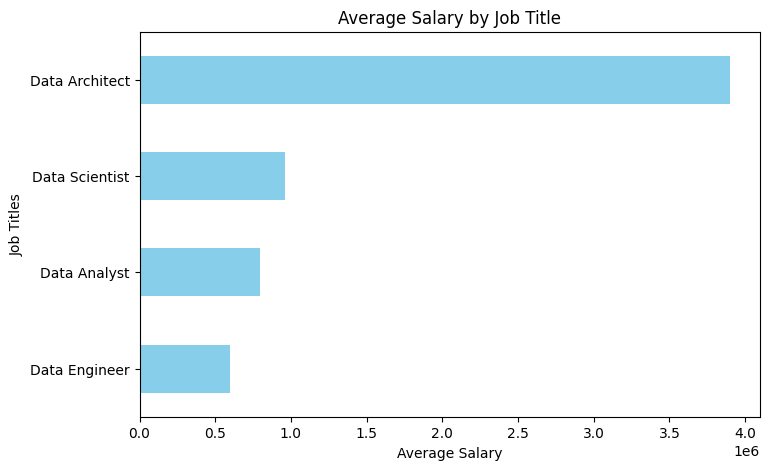

In [ ]:
# Calculate average salary per job title
avg_salary_by_title = df_copy.groupby('Job Title')[['Min Salary', 'Max Salary']].mean()

# Calculate the average of minimum and maximum salaries to represent the range
avg_salary_by_title['Average Salary'] = avg_salary_by_title.mean(axis=1)

# Plotting the bar chart for average salary by job title
plt.figure(figsize=(8, 5 ))
avg_salary_by_title['Average Salary'].sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Average Salary')
plt.title('Average Salary by Job Title')
plt.ylabel('Job Titles')
plt.show()


The visualization illustrates the variation in salary ranges across different job titles and experience levels. Through a bar chart, it showcases how the salary ranges differ for distinct positions based on Job roles. Each bar is segmented by job title, and within each job title segment, the bars represent different average salary.

### What is the distribution of salary ranges among various positions?


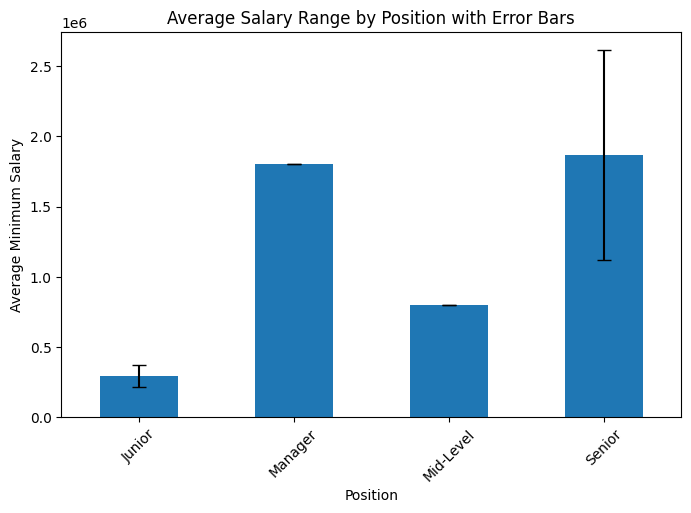

In [ ]:

avg_salary = df_copy.groupby('Position')['Min Salary'].mean()
std_dev = df_copy.groupby('Position')['Min Salary'].std()

plt.figure(figsize=(8, 5))
avg_salary.plot(kind='bar', yerr=std_dev, capsize=5)
plt.title('Average Salary Range by Position with Error Bars')
plt.xlabel('Position')
plt.ylabel('Average Minimum Salary')
plt.xticks(rotation=45)
plt.show()

The bar plot with capsize provides a clear depiction of the distribution of salary ranges among different positions. Each bar represents a distinct position, showcasing the salary range's variation from minimum to maximum values.

**Position-based Salary Ranges:** The plot visualizes the salary ranges prevalent across different job positions, depicting the minimum and maximum salary values with error bars (capsize). This representation highlights the variability within each position.

**Comparative Analysis:** It enables a comparative analysis of salary
distributions among various positions, allowing easy identification of positions with higher or wider salary ranges.

## **Experience Level Insights:**

### What is the distribution of job postings across different experience levels?



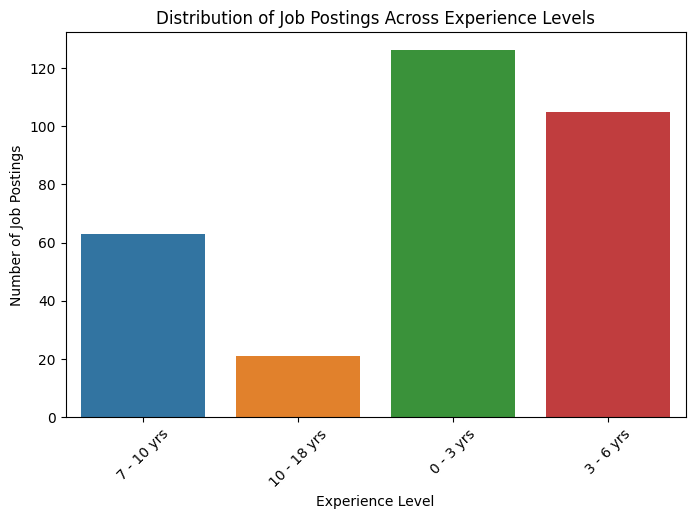

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Experience', data=df_copy)
plt.title('Distribution of Job Postings Across Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.show()

The bar graph effectively communicates the distribution of job postings across different experience levels, allowing viewers to discern patterns, trends, and the relative abundance of job opportunities across various experience categories within the dataset.

### Which experience level has the highest number of job openings?

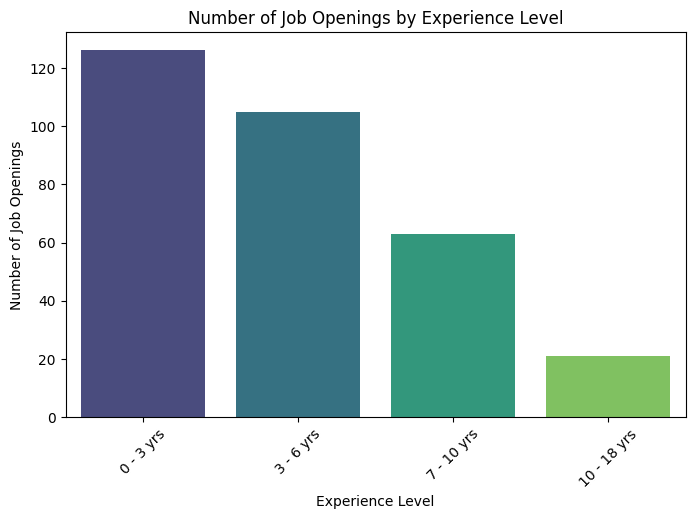

In [ ]:
# Count the number of job openings for each experience level
experience_counts = df_copy['Experience'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=experience_counts.index, y=experience_counts.values, palette='viridis')
plt.title('Number of Job Openings by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Number of Job Openings')
plt.xticks(rotation=45)
plt.show()

The bar graph effectively communicates the distribution of job openings among different experience levels, making it easy to identify which experience category has the highest demand or the most job opportunities within the dataset.

## **Location Analysis:**

### What are the top locations in terms of job availability?


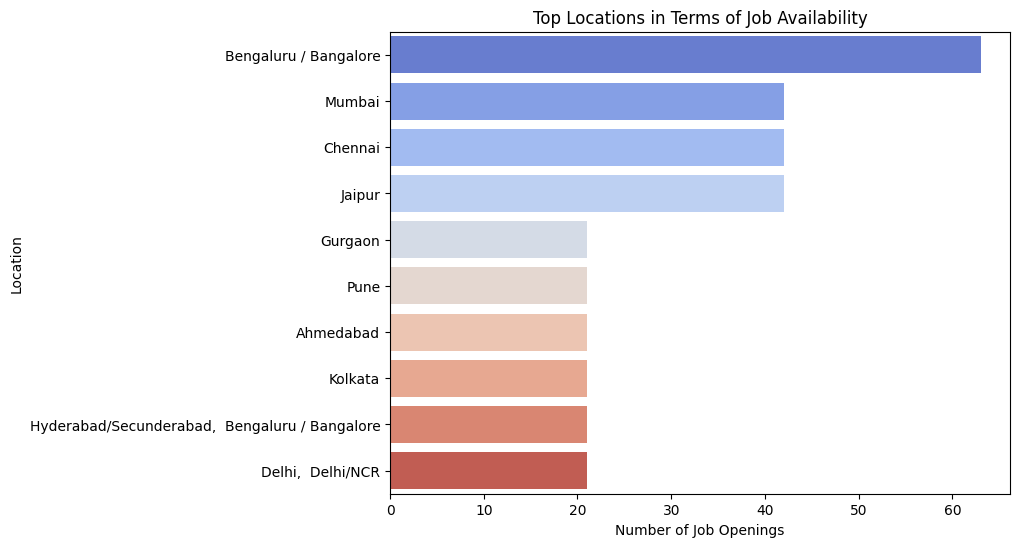

In [ ]:
# Count the number of job openings for each location
location_counts = df_copy['Location'].value_counts().head(10)  # Consider top 10 locations

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=location_counts.values, y=location_counts.index, palette='coolwarm')
plt.title('Top Locations in Terms of Job Availability')
plt.xlabel('Number of Job Openings')
plt.ylabel('Location')
plt.show()

The horizontal bar graph effectively portrays the distribution of job openings among various locations, enabling viewers to quickly identify and understand the regions or cities that offer the highest job availability based on the dataset analyzed.

###Visualizing the job distribution on a geographical map

In [ ]:
from geopy.geocoders import Nominatim

# Initialize geolocator
geolocator = Nominatim(user_agent="job_location_mapping")

# Iterate through DataFrame and fetch coordinates for job locations
for index, row in df_copy.iterrows():
    location = geolocator.geocode(row['Location'])
    if location:
        df_copy.at[index, 'Latitude'] = location.latitude
        df_copy.at[index, 'Longitude'] = location.longitude

# Create the map with folium using the updated DataFrame
map_obj = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Add markers for job locations with available latitude and longitude
for index, row in df_copy.dropna(subset=['Latitude', 'Longitude']).iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Job Title']).add_to(map_obj)

# Display the map
map_obj


A geographical map visualization of job distribution provides a visual narrative, offering insights into regional job densities and patterns, aiding in informed decision-making for various stakeholders involved in the job market.

## **Company Analysis:**

### Which companies have the most job postings?


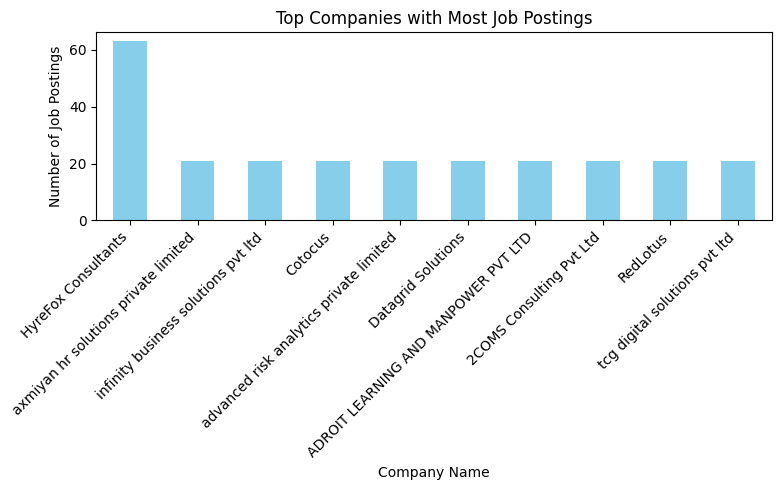

In [ ]:
top_companies = df_copy['Company Name'].value_counts().nlargest(10)  # Get the top 10 companies

plt.figure(figsize=(8, 5))
top_companies.plot(kind='bar', color='skyblue')
plt.title('Top Companies with Most Job Postings')
plt.xlabel('Company Name')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

The bar chart showcasing companies with the most job postings provides a clear and comparative view of recruitment activities across different organizations, offering insights valuable for both job seekers and businesses in the job market.

# **PROJECT SUMMARY:**

After conducting a thorough analysis of data science job listings extracted from TimesJobs, several key insights have emerged, shedding light on the dynamics of the job market within this domain:

1. Job Title Distribution: The analysis revealed a diverse array of job titles,
with 'Data Analyst,' 'Data Scientist,' and 'Data Engineer' being the most prevalent roles.

2. **Experience Requirements:** Experience levels were diverse, with significant demand for mid-level and senior roles. '3 - 6 years' and '7 - 10 years' of experience appeared most frequently among job listings.

3. **Salary Ranges:** Salary distribution varied widely across different positions and experience levels. Salaries for mid-level and senior positions tended to be higher, while junior roles typically had lower compensation.

4. **Geographical Preferences:** Certain locations exhibited higher job availability, with specific regions showing more opportunities for data science positions.

5. **Key Skills:** Analysis highlighted essential skills sought after in the data science domain, such as proficiency in programming languages, statistical analysis, machine learning, and data visualization.

6. **Company Job Postings:** Some companies stood out for their frequency of job postings, reflecting higher demand or active recruitment within the data science field.

7. **Trends by Position:** There were distinct trends observed among different positions, reflecting unique preferences and requirements for each role.

8. **Visualization Insights:** Utilizing various visualizations like bar charts, histograms, and heatmaps provided clear insights into job distribution, salary trends, and geographical job availability.

In conclusion, this comprehensive data analysis offers valuable insights into the landscape of data science job opportunities within the TimesJobs platform. Job seekers, recruiters, and stakeholders can leverage this information to make informed decisions regarding job searches, hiring strategies, and skill development within the data science domain.